In [7]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
import matplotlib.pyplot as plt


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
df = pd.read_csv('training_dataset.csv')
df.head()

,customer_number,usia,pekerjaan,status_perkawinan,pendidikan,gagal_bayar_sebelumnya,pinjaman_rumah,pinjaman_pribadi,jenis_kontak,bulan_kontak_terakhir,...,hari_sejak_kontak_sebelumnya,jumlah_kontak_sebelumnya,hasil_kampanye_sebelumnya,tingkat_variasi_pekerjaan,indeks_harga_konsumen,indeks_kepercayaan_konsumen,suku_bunga_euribor_3bln,jumlah_pekerja,pulau,berlangganan_deposito
0,531036,63,sosial media specialis,menikah,Pendidikan Tinggi,no,yes,no,cellular,jul,...,999,0,nonexistent,-1.7,94.215,-40.3,0.885,4991.6,Papua,1
1,999241,43,teknisi,menikah,Pendidikan Tinggi,no,yes,no,cellular,nov,...,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,Sulawesi,0
2,995002,29,sosial media specialis,lajang,Pendidikan Tinggi,no,yes,yes,cellular,jul,...,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,Papua,0
3,932750,40,pekerja kasar,menikah,SMA,no,no,no,telephone,may,...,999,0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,Sumatera,1
4,684699,40,sosial media specialis,lajang,Pendidikan Tinggi,no,no,no,cellular,aug,...,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,Bali,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22916 entries, 0 to 22915
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_number               22916 non-null  int64  
 1   usia                          22916 non-null  int64  
 2   pekerjaan                     22916 non-null  object 
 3   status_perkawinan             22916 non-null  object 
 4   pendidikan                    22916 non-null  object 
 5   gagal_bayar_sebelumnya        22916 non-null  object 
 6   pinjaman_rumah                22916 non-null  object 
 7   pinjaman_pribadi              22916 non-null  object 
 8   jenis_kontak                  22916 non-null  object 
 9   bulan_kontak_terakhir         22916 non-null  object 
 10  hari_kontak_terakhir          22916 non-null  object 
 11  jumlah_kontak_kampanye_ini    22916 non-null  int64  
 12  hari_sejak_kontak_sebelumnya  22916 non-null  int64  
 13  j

In [12]:
df.isnull().sum()

customer_number                 0
usia                            0
pekerjaan                       0
status_perkawinan               0
pendidikan                      0
gagal_bayar_sebelumnya          0
pinjaman_rumah                  0
pinjaman_pribadi                0
jenis_kontak                    0
bulan_kontak_terakhir           0
hari_kontak_terakhir            0
jumlah_kontak_kampanye_ini      0
hari_sejak_kontak_sebelumnya    0
jumlah_kontak_sebelumnya        0
hasil_kampanye_sebelumnya       0
tingkat_variasi_pekerjaan       0
indeks_harga_konsumen           0
indeks_kepercayaan_konsumen     0
suku_bunga_euribor_3bln         0
jumlah_pekerja                  0
pulau                           0
berlangganan_deposito           0
dtype: int64

In [13]:
df = df.drop('customer_number', axis=1)

In [14]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
numerical_columns

Index(['usia', 'jumlah_kontak_kampanye_ini', 'hari_sejak_kontak_sebelumnya',
       'jumlah_kontak_sebelumnya', 'tingkat_variasi_pekerjaan',
       'indeks_harga_konsumen', 'indeks_kepercayaan_konsumen',
       'suku_bunga_euribor_3bln', 'jumlah_pekerja', 'berlangganan_deposito'],
      dtype='object')

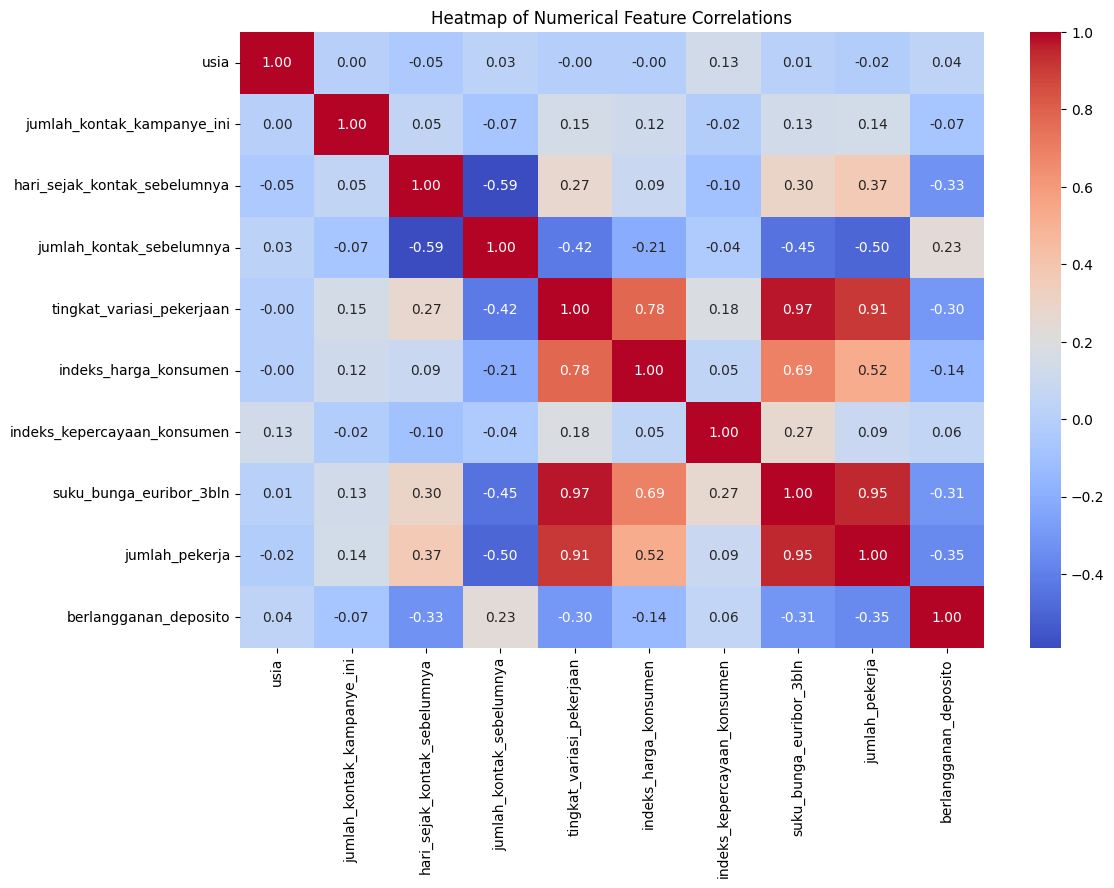

In [15]:
corr_matrix = df[numerical_columns].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Numerical Feature Correlations')
plt.show()

## **Cek and Handling Outlier**

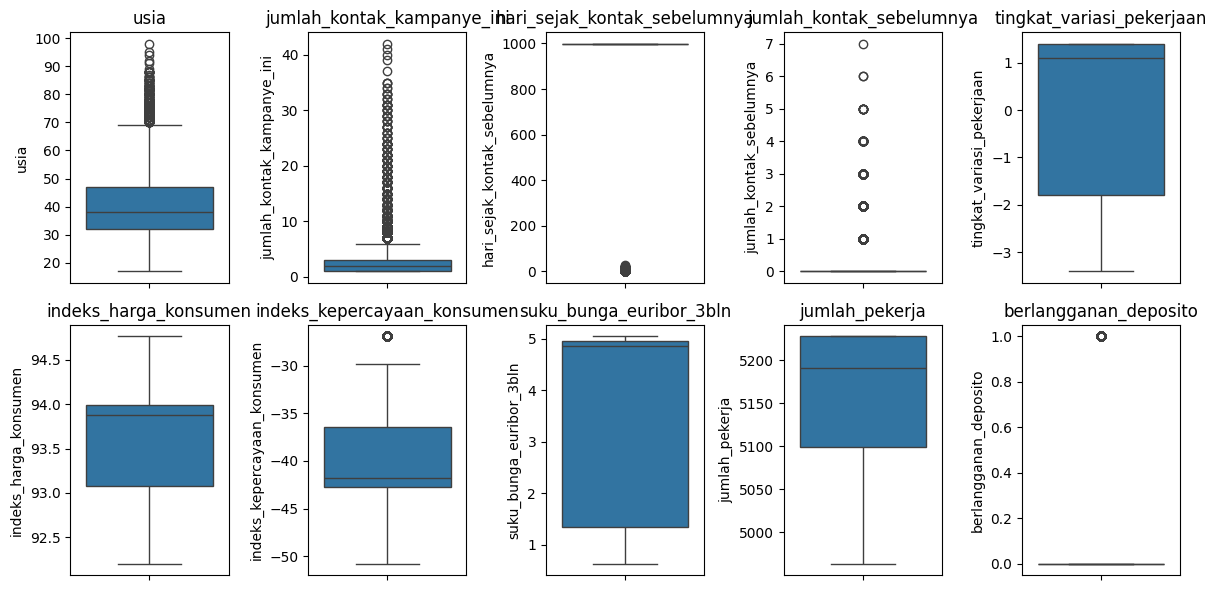

In [16]:
plt.figure(figsize=(12, 6))
# Only iterate through the first 8 numerical columns to fit the 2x4 grid
for i, col in enumerate(numerical_columns[:10]):
    plt.subplot(2, 5, i + 1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [17]:
unique_ages = df['usia'].unique()
unique_ages

array([63, 43, 29, 40, 34, 31, 37, 30, 54, 32, 39, 33, 48, 36, 47, 50, 45,
       38, 44, 28, 25, 42, 57, 26, 24, 51, 53, 56, 27, 49, 46, 52, 35, 23,
       55, 58, 41, 60, 61, 88, 67, 20, 62, 22, 59, 66, 72, 64, 78, 70, 69,
       75, 19, 18, 92, 76, 83, 21, 82, 71, 17, 77, 81, 68, 73, 79, 80, 65,
       86, 74, 85, 84, 91, 94, 89, 95, 87, 98], dtype=int64)

## **Encoding Categorical Feature**

In [18]:
object_columns = df.select_dtypes(include=['object']).columns
for col in object_columns:
  print(f"Unique values for column '{col}':")
  print(df[col].unique())
  print("-" * 20)

Unique values for column 'pekerjaan':
['sosial media specialis' 'teknisi' 'pekerja kasar' 'manajer'
 'asisten rumah tangga' 'mahasiswa' 'penyedia jasa' 'pemilik bisnis'
 'entrepreneur' 'pengangguran' 'pensiunan' 'unknown']
--------------------
Unique values for column 'status_perkawinan':
['menikah' 'lajang' 'cerai' 'unknown']
--------------------
Unique values for column 'pendidikan':
['Pendidikan Tinggi' 'SMA' 'Tidak Tamat SD' 'SMP' 'Diploma' 'SD' 'unknown'
 'TIDAK SEKOLAH']
--------------------
Unique values for column 'gagal_bayar_sebelumnya':
['no' 'unknown' 'yes']
--------------------
Unique values for column 'pinjaman_rumah':
['yes' 'no' 'unknown']
--------------------
Unique values for column 'pinjaman_pribadi':
['no' 'yes' 'unknown']
--------------------
Unique values for column 'jenis_kontak':
['cellular' 'telephone']
--------------------
Unique values for column 'bulan_kontak_terakhir':
['jul' 'nov' 'may' 'aug' 'oct' 'apr' 'jun' 'sep' 'mar' 'dec']
--------------------
Unique

In [19]:
# Select object columns again after filtering
object_columns = df.select_dtypes(include=['object']).columns

# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Fit and transform the selected object columns
encoded_data = encoder.fit_transform(df[object_columns])

# Create a DataFrame from the encoded data
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(object_columns), index=df.index)

# Drop the original object columns from the dataframe
df = df.drop(columns=object_columns)

# Concatenate the original dataframe with the new encoded dataframe
df = pd.concat([df, encoded_df], axis=1)

df.head()

,usia,jumlah_kontak_kampanye_ini,hari_sejak_kontak_sebelumnya,jumlah_kontak_sebelumnya,tingkat_variasi_pekerjaan,indeks_harga_konsumen,indeks_kepercayaan_konsumen,suku_bunga_euribor_3bln,jumlah_pekerja,berlangganan_deposito,...,hasil_kampanye_sebelumnya_nonexistent,hasil_kampanye_sebelumnya_success,pulau_Bali,pulau_Jawa,pulau_Kalimantan,pulau_NTB,pulau_NTT,pulau_Papua,pulau_Sulawesi,pulau_Sumatera
0,63,2,999,0,-1.7,94.215,-40.3,0.885,4991.6,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,43,2,999,0,-0.1,93.200,-42.0,4.021,5195.8,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,29,1,999,0,1.4,93.918,-42.7,4.958,5228.1,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,40,2,999,0,1.1,93.994,-36.4,4.859,5191.0,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,40,3,999,0,1.4,93.444,-36.1,4.964,5228.1,0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## **Handling Imbalance Data**

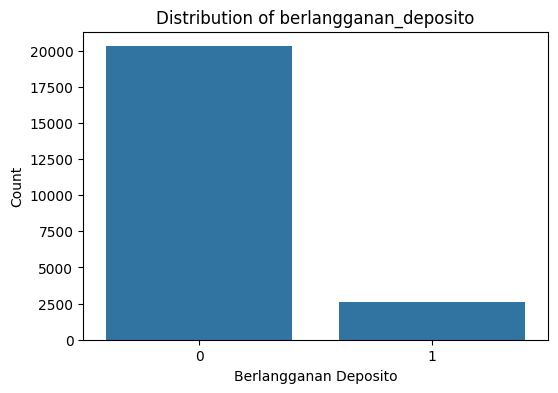

In [20]:
# Visualize the distribution of 'berlangganan_deposito'
plt.figure(figsize=(6, 4))
sns.countplot(x='berlangganan_deposito', data=df)
plt.title('Distribution of berlangganan_deposito')
plt.xlabel('Berlangganan Deposito')
plt.ylabel('Count')
plt.show()

In [21]:
X = df.drop('berlangganan_deposito', axis=1)
y = df['berlangganan_deposito']

# Define the SMOTE sampler
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_resampled, y_resampled = smote.fit_resample(X, y)

# Display the new distribution of the target variable
print("Original dataset shape %s" % y.value_counts())
print("Resampled dataset shape %s" % y_resampled.value_counts())

Original dataset shape berlangganan_deposito
0    20302
1     2614
Name: count, dtype: int64
Resampled dataset shape berlangganan_deposito
1    20302
0    20302
Name: count, dtype: int64


In [22]:
# Experiment 1: MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
scaler_minmax = MinMaxScaler()

# Fit and transform the resampled features
X_resampled_minmax = scaler_minmax.fit_transform(X_resampled)

# Split the data
X_train_minmax, X_test_minmax, y_train_minmax, y_test_minmax = train_test_split(
    X_resampled_minmax, y_resampled, test_size=0.2, random_state=42
)

print("\nExperiment 1 (MinMaxScaler):")
print("X_train shape:", X_train_minmax.shape)
print("X_test shape:", X_test_minmax.shape)
print("y_train shape:", y_train_minmax.shape)
print("y_test shape:", y_test_minmax.shape)


Experiment 1 (MinMaxScaler):
X_train shape: (32483, 70)
X_test shape: (8121, 70)
y_train shape: (32483,)
y_test shape: (8121,)


## **Modelling**

In [23]:
!pip install xgboost

from xgboost import XGBClassifier

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB 640.0 kB/s eta 0:03:55
   ---------------------------------------- 0.1/150.0 MB 1.6 MB/s eta 0:01:33
   ---------------------------------------- 0.4/150.0 MB 3.2 MB/s eta 0:00:47
   ---------------------------------------- 0.7/150.0 MB 5.2 MB/s eta 0:00:29
   ---------------------------------------- 1.3/150.0 MB 6.7 MB/s eta 0:00:23
   ---------------------------------------- 1.7/150.0 MB 7.4 MB/s eta 0:00:21
    --------------------------------------- 2.2/150.0 MB 8.3 MB/s eta 0:00:18
    --------------------------------------- 2.7/150.0 MB 8.5 MB/s eta 0:00:18
    --------------------------------------- 3.1/150.0 MB 8.7 MB/s eta 0:00:17
    --------------------------------------- 3.7/150.0 MB 9.1 MB/s eta 0:00:17
   - -------------------------------------- 4.2/150.0 MB 9.2 MB/s eta 0:00:16
   - -------------------------------------- 4.7/150.0 MB 9.6 MB/s eta


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [24]:
# Using the data scaled with MinMaxScaler (Experiment 1)
# Initialize the XGBoost Classifier
xgb_model_minmax = XGBClassifier(objective='binary:logistic',  # For binary classification
                                 eval_metric='logloss',         # Evaluation metric
                                 use_label_encoder=False,       # Recommended setting
                                 random_state=42)

# Train the model
xgb_model_minmax.fit(X_train_minmax, y_train_minmax)

# Make predictions on the test set
y_pred_minmax = xgb_model_minmax.predict(X_test_minmax)

# Evaluate the model
accuracy_minmax = accuracy_score(y_test_minmax, y_pred_minmax)
precision_minmax = precision_score(y_test_minmax, y_pred_minmax)
recall_minmax = recall_score(y_test_minmax, y_pred_minmax)
f1_minmax = f1_score(y_test_minmax, y_pred_minmax)
roc_auc_minmax = roc_auc_score(y_test_minmax, y_pred_minmax)

print("\nXGBoost Model Evaluation (MinMaxScaler):")
print(f"Accuracy: {accuracy_minmax:.4f}")
print(f"Precision: {precision_minmax:.4f}")
print(f"Recall: {recall_minmax:.4f}")
print(f"F1 Score: {f1_minmax:.4f}")
print(f"ROC AUC Score: {roc_auc_minmax:.4f}")

c:\Users\MSI\Lib\site-packages\xgboost\training.py:183: UserWarning: [10:44:54] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



XGBoost Model Evaluation (MinMaxScaler):
Accuracy: 0.9395
Precision: 0.9666
Recall: 0.9109
F1 Score: 0.9379
ROC AUC Score: 0.9396


In [25]:
from sklearn.metrics import classification_report

# Classification Report for Experiment 1 (MinMaxScaler)
print("\nClassification Report for Experiment 1 (MinMaxScaler):")
print(classification_report(y_test_minmax, y_pred_minmax))


Classification Report for Experiment 1 (MinMaxScaler):
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      4049
           1       0.97      0.91      0.94      4072

    accuracy                           0.94      8121
   macro avg       0.94      0.94      0.94      8121
weighted avg       0.94      0.94      0.94      8121



In [27]:
import pandas as pd
# Load the validation dataset
df_validation = pd.read_csv('validation_set.csv')

# Keep the original customer numbers for the output
customer_numbers = df_validation['customer_number']

# Drop the 'customer_number' column from the validation set for prediction
df_validation_processed = df_validation.drop('customer_number', axis=1)

# Identify object columns in the validation set
object_columns_validation = df_validation_processed.select_dtypes(include=['object']).columns

# Apply the same OneHotEncoder fitted on the training data to the validation data
# Handle unknown values by ignoring them
encoded_data_validation = encoder.transform(df_validation_processed[object_columns_validation])

# Create a DataFrame from the encoded validation data
encoded_df_validation = pd.DataFrame(encoded_data_validation, columns=encoder.get_feature_names_out(object_columns_validation), index=df_validation_processed.index)

# Drop the original object columns from the validation dataframe
df_validation_processed = df_validation_processed.drop(columns=object_columns_validation)

# Concatenate the original validation dataframe with the new encoded validation dataframe
df_validation_processed = pd.concat([df_validation_processed, encoded_df_validation], axis=1)

# Ensure the validation set has the same columns as the training set after encoding
# Add missing columns in validation set with default value 0
missing_cols = set(X.columns) - set(df_validation_processed.columns)
for c in missing_cols:
    df_validation_processed[c] = 0

# Ensure the order of columns is the same as the training set
df_validation_processed = df_validation_processed[X.columns]


# Apply the same scaler used in Experiment 1 (MinMaxScaler) to the validation data
X_validation_scaled = scaler_minmax.transform(df_validation_processed)

# Make predictions on the validation set using the model trained with MinMaxScaler
# We want probabilities
validation_probabilities = xgb_model_minmax.predict_proba(X_validation_scaled)[:, 1] # Get probability of the positive class (1)

# Create the output DataFrame
output_df = pd.DataFrame({
    'customer_number': customer_numbers,
    'berlangganan_deposito': validation_probabilities
})

# Save the output to a CSV file
output_df.to_csv('prediction_results.csv', index=False)

print("Predictions saved to prediction_results.csv")

# Display the first few rows of the output file
print(output_df.head())


Predictions saved to prediction_results.csv
   customer_number  berlangganan_deposito
0           445420               0.063739
1           585604               0.015517
2           888824               0.024227
3           816820               0.013993
4           542716               0.046723
